In [96]:
# import libraries
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

# read the statement
data = pd.read_csv('statement.csv')

data = data.set_index('Tran Date')
data.index = pd.to_datetime(data.index, format = '%d-%m-%Y')

debitOnly =  data['CR'] == ' '
creditOnly =  data['DR'] == ' '

debitData = data[debitOnly]
creditData = data[creditOnly]

debitData.loc[:, 'DR'] = pd.to_numeric(debitData.loc[:,'DR'])
creditData.loc[:, 'CR'] = pd.to_numeric(creditData.loc[:,'CR'])

totalDebit = debitData['DR'].sum()
totalCredit = creditData['CR'].sum()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [97]:
debitData.describe()

,DR,BAL,SOL
count,1095.000000,1095.000000,1095.000000
mean,3042.057224,47879.245479,382.348858
std,10022.996988,31838.758935,385.834300
min,1.000000,26.720000,2.000000
25%,220.900000,23304.340000,315.000000
50%,500.000000,40215.990000,315.000000
75%,1608.000000,65198.480000,315.000000
max,153000.000000,192942.260000,2877.000000


In [98]:
creditData.describe()

,CR,BAL,SOL
count,331.000000,331.000000,331.000000
mean,10241.386949,56643.052810,251.516616
std,20020.375711,34190.166809,279.488725
min,0.030000,552.470000,2.000000
25%,187.250000,30766.265000,100.000000
50%,766.000000,54643.490000,315.000000
75%,7749.000000,73364.120000,315.000000
max,150000.000000,197692.260000,2352.000000


In [99]:
len(debitData)

1095

In [100]:
len(creditData)

331

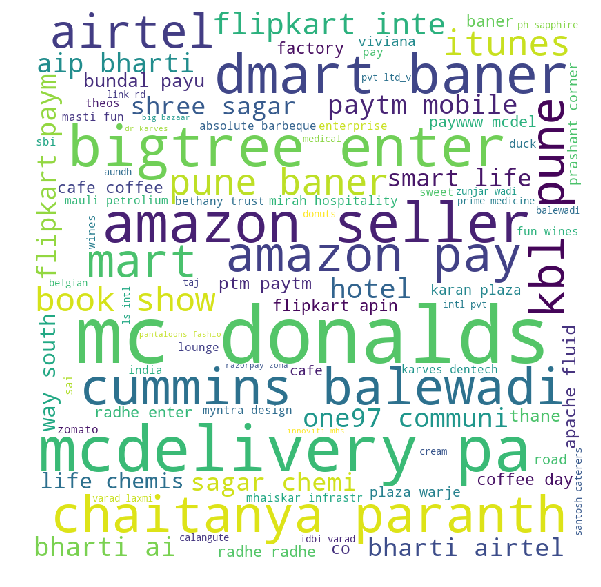

In [101]:
comment_words = ' '

wordfreq = {}

# iterate through the csv file 
for val in debitData['PARTICULARS']: 
      
    # typecaste each val to string 
    val = str(val)
  
    # split the value 
    tokens = val.split('/')[1:2]
    
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        if not words.isalnum():
            if words not in wordfreq:
                wordfreq[words] = 0 
            wordfreq[words] += 1
            comment_words = comment_words + words + ' ' 
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

This word cloud is based on the number of debits at the location

In [102]:
wordfreq = sorted([(v,k) for (k,v) in wordfreq.items()], reverse=True)

In [103]:
topMatch = wordfreq[1:72]
topMatch

[(27, 'mcdelivery pa'),
 (21, 'bigtree enter'),
 (20, 'amazon seller'),
 (19, 'dmart baner'),
 (17, 'cummins balewadi'),
 (17, 'chaitanya paranth'),
 (14, 'www.airtel.in'),
 (14, 'kbl pune-baner'),
 (14, 'd mart'),
 (13, 'itunes.com'),
 (12, 'flipkart inte'),
 (12, 'book my show'),
 (12, 'amazon pay'),
 (9, 'paytm mobile'),
 (9, 'one97 communi'),
 (9, 'flipkart paym'),
 (9, 'aip bharti ai'),
 (8, 'way down south'),
 (8, 'smart life chemis'),
 (8, 'shree sagar chemi'),
 (8, 'bundal payu a'),
 (8, 'bharti airtel'),
 (7, 'ptm paytm'),
 (7, 'apache the fluid'),
 (6, 'the k factory'),
 (6, 'radhe radhe enter'),
 (6, 'paywww mcdel'),
 (6, 'flipkart apin'),
 (6, 'cafe coffee day'),
 (5, 'prashant corner'),
 (5, 'mirah hospitality'),
 (4, 'theos '),
 (4, 'myntra design'),
 (4, 'mhaiskar infrastr'),
 (4, 'mauli petrolium'),
 (4, 'masti fun n wines'),
 (4, 'bethany trust - b'),
 (4, 'amazon pay in'),
 (4, 'absolute barbeque'),
 (3, 'zunjar wadi'),
 (3, 'santosh caterers'),
 (3, 'razorpay zoma'),

In [104]:
my_dict = {}
for key, val in wordfreq:
    s = debitData[debitData['PARTICULARS'].str.contains(val, case=False)]['DR'].sum()
    my_dict[val] =  s
    print(s)

9277.039999999999
10132.0
10625.760000000002
16570.54
6931.03
11600.0
3519.0
3531.0
27500.0
4650.43
1085.0
10454.0
6723.199999999999
9324.21
6634.0
5798.639999999999
12383.0
3129.0
1921.0
914.0
1350.0
1721.0
3125.0
6614.0
16582.0
7130.0
2255.0
2111.0
6558.0
1459.0
1699.0
9390.0
2416.0
4258.41
920.0
500.0
5150.0
3950.0
676.76
8604.0
3800.0
966.0
352.5
789.0
1781.0
3350.5
10236.1
13500.0
1465.0
7300.0
25170.0
8804.41
2800.0
287.90999999999997
1399.0
6795.0
890.0
3412.0
3500.0
2650.14
1258.0
1577.0
25076.0
228.0
610.0
6592.0
178.52
1367.0
905.0
780.0
5122.0
3304.56
1773.0
2401.31
1100.0
2326.0
502.7
800.0


error: nothing to repeat at position 0

In [105]:
my_dict

{'mc donalds': 9277.039999999999,
 'mcdelivery pa': 10132.0,
 'bigtree enter': 10625.760000000002,
 'amazon seller': 16570.54,
 'dmart baner': 6931.03,
 'cummins balewadi': 11600.0,
 'chaitanya paranth': 3519.0,
 'www.airtel.in': 3531.0,
 'kbl pune-baner': 27500.0,
 'd mart': 4650.43,
 'itunes.com': 1085.0,
 'flipkart inte': 10454.0,
 'book my show': 6723.199999999999,
 'amazon pay': 9324.21,
 'paytm mobile': 6634.0,
 'one97 communi': 5798.639999999999,
 'flipkart paym': 12383.0,
 'aip bharti ai': 3129.0,
 'way down south': 1921.0,
 'smart life chemis': 914.0,
 'shree sagar chemi': 1350.0,
 'bundal payu a': 1721.0,
 'bharti airtel': 3125.0,
 'ptm paytm': 6614.0,
 'apache the fluid': 16582.0,
 'the k factory': 7130.0,
 'radhe radhe enter': 2255.0,
 'paywww mcdel': 2111.0,
 'flipkart apin': 6558.0,
 'cafe coffee day': 1459.0,
 'prashant corner': 1699.0,
 'mirah hospitality': 9390.0,
 'theos ': 2416.0,
 'myntra design': 4258.41,
 'mhaiskar infrastr': 920.0,
 'mauli petrolium': 500.0,
 'ma

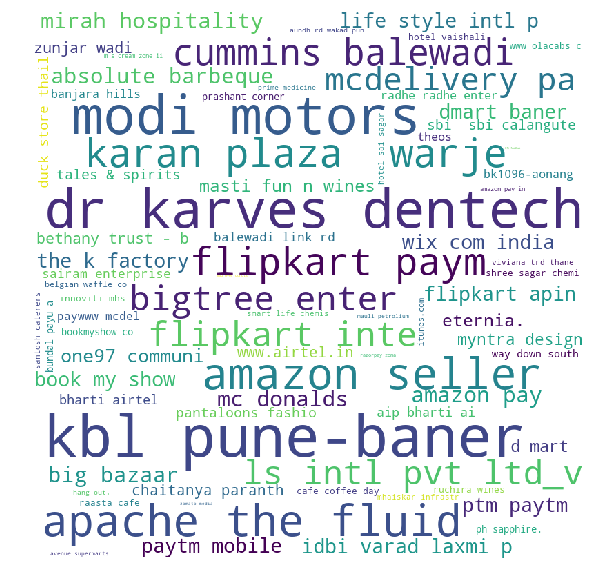

In [106]:
wc = WordCloud(background_color="white", width=800, height=800, min_font_size = 1).generate_from_frequencies(my_dict)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

This word cloud is based on the expenditure at a particular place

In [39]:
debitMonthWise = debitData.resample('M').sum()

(array([736208., 736330., 736450., 736573., 736695., 736815., 736938.,
        737060., 737180., 737303.]), <a list of 10 Text xticklabel objects>)

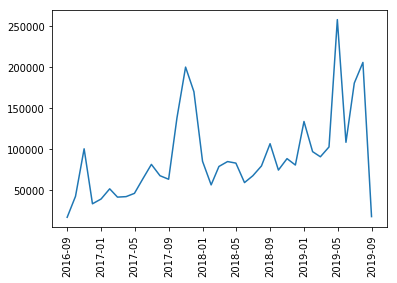

In [40]:
plt.plot(debitMonthWise.index, debitMonthWise['DR'])
plt.xticks(rotation = 90)